# 特征谱提取

In [1]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle

path = ['E:/JupyterWorkspace/DeepFakeDetection-master/DF/fake_img/', 'E:/JupyterWorkspace/DeepFakeDetection-master/DF/real_img/']
labels = [1,0]
epsilon = 1e-8
data = {}
#number of samples from each dataset
stop = 20000
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 156])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    
    iter_ = 0
    psd1D_average_org = np.zeros(156)
    
    for filename in glob.glob(path[z]+"/*.jpg"):
        
        img = cv2.imread(filename,0)
        # Calculate FFT
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        if z==0:
            psd1D_total[iter_,:] = psd1D
            label_total[iter_] = labels[z]
        if z==1:
            psd1D_total[iter_+stop,:] = psd1D
            label_total[iter_+stop] = labels[z]
        iter_+=1
        print(iter_)
        if iter_ >= stop:
            break

data["data"] = psd1D_total
data["label"] = label_total

output = open('dataset_freq_1000.pkl', 'wb')
pickle.dump(data, output)
output.close()
print("DATA Saved")    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345


6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992


8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640


10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
1024

11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
1163

12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
1301

14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
1440

15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
1577

16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
1715

18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
1852

19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
1989

1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745


3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400


4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047


6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703


8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346


9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996


11197
11198
11199
11200
11201
11202
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
1136

12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12651
12652
12653
12654
12655
12656
12657
12658
12659
12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12698
12699
12700
12701
12702
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
1274

13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
1411

15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
1550

16711
16712
16713
16714
16715
16716
16717
16718
16719
16720
16721
16722
16723
16724
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16759
16760
16761
16762
16763
16764
16765
16766
16767
16768
16769
16770
16771
16772
16773
16774
16775
16776
16777
16778
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16794
16795
16796
16797
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
1687

18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
18175
18176
18177
18178
18179
18180
18181
18182
18183
18184
18185
18186
18187
18188
18189
18190
18191
18192
18193
18194
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
1826

19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19564
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
1963

In [1]:
#数据浏览
import  pickle
f=open('dataset_freq_1000.pkl','rb')
data = pickle.load(f)
print(data)

{'data': array([[245.69640083, 236.92262922, 231.19684504, ...,  86.53965073,
         92.99415475,  85.80248537],
       [245.70831327, 236.49098551, 230.89078871, ...,  85.46076431,
         83.40872352,  84.21000161],
       [247.38742453, 236.28579901, 232.13218985, ...,  85.54451458,
         89.52278228,  84.04939427],
       ...,
       [245.76473465, 235.65133156, 227.37442977, ...,  82.92334199,
         78.38824636,  75.28455432],
       [256.71165494, 250.05135711, 239.74084846, ...,  96.90579444,
         97.29525311,  94.00274389],
       [254.47482471, 250.72869548, 236.43735079, ..., 102.96946356,
        101.43641186, 101.30855196]]), 'label': array([1., 1., 1., ..., 0., 0., 0.])}


# 三种分类及效果

In [2]:
#包导入
%matplotlib inline
import pandas as pd
import numpy as np
import pickle

import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers

C:\Users\葛宇\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\葛宇\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\葛宇\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\葛宇\AppData\Roaming\Python\Pytho

In [3]:
#数据读取
pkl_file = open('dataset_freq_1000.pkl', 'rb')
    
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
#SVM分类
epochs = 5
for z in range(epochs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    try:
        svclassifier = SVC()
        svclassifier.fit(X_train, y_train)   
        print("Accuracy = {:.6f}".format(svclassifier.score(X_test,y_test)))
    except:
        epochs-=1
        print(epochs)

Accuracy = 0.966125
Accuracy = 0.964375
Accuracy = 0.965375
Accuracy = 0.963125
Accuracy = 0.964000


In [5]:
#LR分类
epochs = 5
for z in range(epochs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    try:
        lr = LogisticRegressionCV()
        lr.fit(X_train,y_train)
        print("Accuracy = {:.6f}".format(lr.score(X_test,y_test)))
    except:
        epochs-=1
        print(epochs)

Accuracy = 0.687500
Accuracy = 0.677500
Accuracy = 0.678250
Accuracy = 0.705250
Accuracy = 0.694750


In [4]:
X_train/=255
X_test/=255

In [16]:
#神经网络分类

model = models.Sequential()
model.add(tensorflow.keras.layers.Dense(128, activation='relu', input_shape=(156,)))
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=256,
                    validation_data=(X_test, y_test))

Train on 32000 samples, validate on 8000 samples
Epoch 1/2000
32000/32000 [==============================] - 1s 39us/sample - loss: 0.6929 - acc: 0.5089 - val_loss: 0.6921 - val_acc: 0.5104
Epoch 2/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6907 - acc: 0.5274 - val_loss: 0.6889 - val_acc: 0.5310
Epoch 3/2000
32000/32000 [==============================] - 1s 19us/sample - loss: 0.6894 - acc: 0.5251 - val_loss: 0.6914 - val_acc: 0.5200
Epoch 4/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6849 - acc: 0.5412 - val_loss: 0.6796 - val_acc: 0.5500
Epoch 5/2000
32000/32000 [==============================] - 0s 15us/sample - loss: 0.6808 - acc: 0.5387 - val_loss: 0.6766 - val_acc: 0.5580
Epoch 6/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6747 - acc: 0.5506 - val_loss: 0.6746 - val_acc: 0.5562
Epoch 7/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6794 - acc: 0.5420 -

32000/32000 [==============================] - 1s 17us/sample - loss: 0.6688 - acc: 0.5603 - val_loss: 0.6724 - val_acc: 0.5611
Epoch 116/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6690 - acc: 0.5576 - val_loss: 0.6750 - val_acc: 0.5623
Epoch 117/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6675 - acc: 0.5588 - val_loss: 0.6654 - val_acc: 0.5591
Epoch 118/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6647 - acc: 0.5662 - val_loss: 0.6654 - val_acc: 0.5725
Epoch 119/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6649 - acc: 0.5662 - val_loss: 0.6676 - val_acc: 0.5660
Epoch 120/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6643 - acc: 0.5665 - val_loss: 0.6634 - val_acc: 0.5766
Epoch 121/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6622 - acc: 0.5717 - val_loss: 0.6625 - val_acc: 0.5759
Epoch 122/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.6232 - acc: 0.6115 - val_loss: 0.6347 - val_acc: 0.6118
Epoch 230/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6162 - acc: 0.6159 - val_loss: 0.6144 - val_acc: 0.6217
Epoch 231/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6212 - acc: 0.6114 - val_loss: 0.6128 - val_acc: 0.6214
Epoch 232/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6138 - acc: 0.6186 - val_loss: 0.6099 - val_acc: 0.6216
Epoch 233/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6191 - acc: 0.6119 - val_loss: 0.6096 - val_acc: 0.6319
Epoch 234/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.6165 - acc: 0.6165 - val_loss: 0.6194 - val_acc: 0.6136
Epoch 235/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.6199 - acc: 0.6145 - val_loss: 0.6120 - val_acc: 0.6134
Epoch 236/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.5802 - acc: 0.6664 - val_loss: 0.5728 - val_acc: 0.6718
Epoch 344/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5792 - acc: 0.6676 - val_loss: 0.5708 - val_acc: 0.6780
Epoch 345/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5856 - acc: 0.6629 - val_loss: 0.5836 - val_acc: 0.6649
Epoch 346/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5816 - acc: 0.6649 - val_loss: 0.5942 - val_acc: 0.6479
Epoch 347/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5810 - acc: 0.6641 - val_loss: 0.5907 - val_acc: 0.6515
Epoch 348/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5816 - acc: 0.6651 - val_loss: 0.5762 - val_acc: 0.6867
Epoch 349/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5816 - acc: 0.6640 - val_loss: 0.5721 - val_acc: 0.6784
Epoch 350/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.5519 - acc: 0.6865 - val_loss: 0.5504 - val_acc: 0.6941
Epoch 458/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5488 - acc: 0.6833 - val_loss: 0.5436 - val_acc: 0.7029
Epoch 459/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.5527 - acc: 0.6847 - val_loss: 0.5320 - val_acc: 0.7078
Epoch 460/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5591 - acc: 0.6803 - val_loss: 0.5389 - val_acc: 0.7010
Epoch 461/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5486 - acc: 0.6868 - val_loss: 0.5409 - val_acc: 0.7011
Epoch 462/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5444 - acc: 0.6954 - val_loss: 0.5707 - val_acc: 0.6683
Epoch 463/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5445 - acc: 0.6921 - val_loss: 0.5369 - val_acc: 0.6950
Epoch 464/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.5318 - acc: 0.7046 - val_loss: 0.5257 - val_acc: 0.7086
Epoch 572/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5186 - acc: 0.7149 - val_loss: 0.5186 - val_acc: 0.7245
Epoch 573/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5282 - acc: 0.7074 - val_loss: 0.5513 - val_acc: 0.6884
Epoch 574/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5234 - acc: 0.7150 - val_loss: 0.5076 - val_acc: 0.7295
Epoch 575/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.5220 - acc: 0.7147 - val_loss: 0.5535 - val_acc: 0.6768
Epoch 576/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5214 - acc: 0.7168 - val_loss: 0.5227 - val_acc: 0.7105
Epoch 577/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5265 - acc: 0.7108 - val_loss: 0.5127 - val_acc: 0.7269
Epoch 578/2000

32000/32000 [==============================] - 1s 16us/sample - loss: 0.4932 - acc: 0.7381 - val_loss: 0.4783 - val_acc: 0.7540
Epoch 686/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5025 - acc: 0.7306 - val_loss: 0.4804 - val_acc: 0.7544
Epoch 687/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4972 - acc: 0.7342 - val_loss: 0.4937 - val_acc: 0.7306
Epoch 688/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.5058 - acc: 0.7263 - val_loss: 0.4822 - val_acc: 0.7498
Epoch 689/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5090 - acc: 0.7291 - val_loss: 0.5204 - val_acc: 0.7048
Epoch 690/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5156 - acc: 0.7244 - val_loss: 0.4940 - val_acc: 0.7455
Epoch 691/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.5028 - acc: 0.7317 - val_loss: 0.4879 - val_acc: 0.7437
Epoch 692/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.4889 - acc: 0.7438 - val_loss: 0.5257 - val_acc: 0.7331
Epoch 800/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.5107 - acc: 0.7283 - val_loss: 0.4641 - val_acc: 0.7653
Epoch 801/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4932 - acc: 0.7398 - val_loss: 0.5368 - val_acc: 0.6933
Epoch 802/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4879 - acc: 0.7439 - val_loss: 0.4815 - val_acc: 0.7504
Epoch 803/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4807 - acc: 0.7476 - val_loss: 0.4848 - val_acc: 0.7505
Epoch 804/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4913 - acc: 0.7419 - val_loss: 0.5421 - val_acc: 0.7094
Epoch 805/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4933 - acc: 0.7418 - val_loss: 0.5311 - val_acc: 0.7080
Epoch 806/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.4716 - acc: 0.7569 - val_loss: 0.4867 - val_acc: 0.7408
Epoch 914/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4759 - acc: 0.7510 - val_loss: 0.4941 - val_acc: 0.7329
Epoch 915/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4679 - acc: 0.7593 - val_loss: 0.4580 - val_acc: 0.7704
Epoch 916/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4643 - acc: 0.7611 - val_loss: 0.4440 - val_acc: 0.7755
Epoch 917/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4668 - acc: 0.7589 - val_loss: 0.4539 - val_acc: 0.7636
Epoch 918/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4611 - acc: 0.7649 - val_loss: 0.4893 - val_acc: 0.7370
Epoch 919/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4739 - acc: 0.7526 - val_loss: 0.4954 - val_acc: 0.7377
Epoch 920/2000

32000/32000 [==============================] - 1s 17us/sample - loss: 0.4570 - acc: 0.7647 - val_loss: 0.4479 - val_acc: 0.7749
Epoch 1028/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4601 - acc: 0.7651 - val_loss: 0.4653 - val_acc: 0.7565
Epoch 1029/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4723 - acc: 0.7571 - val_loss: 0.4689 - val_acc: 0.7640
Epoch 1030/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.4427 - acc: 0.7782 - val_loss: 0.4460 - val_acc: 0.7775
Epoch 1031/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4552 - acc: 0.7666 - val_loss: 0.5241 - val_acc: 0.7231
Epoch 1032/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4564 - acc: 0.7669 - val_loss: 0.4449 - val_acc: 0.7789
Epoch 1033/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4447 - acc: 0.7782 - val_loss: 0.4293 - val_acc: 0.7860
Epoch 10

32000/32000 [==============================] - 0s 16us/sample - loss: 0.4416 - acc: 0.7779 - val_loss: 0.4411 - val_acc: 0.7775
Epoch 1085/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4455 - acc: 0.7754 - val_loss: 0.4479 - val_acc: 0.7794
Epoch 1086/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4427 - acc: 0.7768 - val_loss: 0.4262 - val_acc: 0.7869
Epoch 1087/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4451 - acc: 0.7751 - val_loss: 0.4769 - val_acc: 0.7425
Epoch 1088/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4456 - acc: 0.7742 - val_loss: 0.5298 - val_acc: 0.7174
Epoch 1089/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4456 - acc: 0.7760 - val_loss: 0.4366 - val_acc: 0.7857
Epoch 1090/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4334 - acc: 0.7840 - val_loss: 0.4184 - val_acc: 0.7960
Epoch 10

Epoch 1141/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4285 - acc: 0.7864 - val_loss: 0.4163 - val_acc: 0.7922
Epoch 1142/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4367 - acc: 0.7824 - val_loss: 0.4244 - val_acc: 0.7880
Epoch 1143/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4361 - acc: 0.7836 - val_loss: 0.4299 - val_acc: 0.7862
Epoch 1144/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4304 - acc: 0.7868 - val_loss: 0.4313 - val_acc: 0.7836
Epoch 1145/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4348 - acc: 0.7852 - val_loss: 0.4153 - val_acc: 0.7960
Epoch 1146/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4321 - acc: 0.7852 - val_loss: 0.4195 - val_acc: 0.7922
Epoch 1147/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4375 - acc: 0.7846 - val_loss: 0.4296 - val_acc:

Epoch 1198/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.4348 - acc: 0.7853 - val_loss: 0.4586 - val_acc: 0.7621
Epoch 1199/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4369 - acc: 0.7818 - val_loss: 0.4184 - val_acc: 0.7966
Epoch 1200/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4333 - acc: 0.7857 - val_loss: 0.4231 - val_acc: 0.7939
Epoch 1201/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4276 - acc: 0.7912 - val_loss: 0.4249 - val_acc: 0.7908
Epoch 1202/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4166 - acc: 0.7977 - val_loss: 0.4108 - val_acc: 0.7991
Epoch 1203/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4573 - acc: 0.7718 - val_loss: 0.5443 - val_acc: 0.7278
Epoch 1204/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4242 - acc: 0.7910 - val_loss: 0.4267 - val_acc:

Epoch 1311/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4327 - acc: 0.7873 - val_loss: 0.4241 - val_acc: 0.7914
Epoch 1312/2000
32000/32000 [==============================] - 1s 19us/sample - loss: 0.4194 - acc: 0.7962 - val_loss: 0.4348 - val_acc: 0.7897
Epoch 1313/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4463 - acc: 0.7779 - val_loss: 0.4194 - val_acc: 0.7975
Epoch 1314/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4145 - acc: 0.7984 - val_loss: 0.4273 - val_acc: 0.7822
Epoch 1315/2000
32000/32000 [==============================] - 1s 19us/sample - loss: 0.4090 - acc: 0.8024 - val_loss: 0.3973 - val_acc: 0.8149
Epoch 1316/2000
32000/32000 [==============================] - 1s 20us/sample - loss: 0.4404 - acc: 0.7826 - val_loss: 0.4689 - val_acc: 0.7580
Epoch 1317/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4034 - acc: 0.8077 - val_loss: 0.4369 - val_acc:

Epoch 1368/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3995 - acc: 0.8101 - val_loss: 0.3932 - val_acc: 0.8148
Epoch 1369/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4079 - acc: 0.8053 - val_loss: 0.4037 - val_acc: 0.8114
Epoch 1370/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4303 - acc: 0.7892 - val_loss: 0.4462 - val_acc: 0.7840
Epoch 1371/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4323 - acc: 0.7876 - val_loss: 0.4046 - val_acc: 0.8089
Epoch 1372/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4062 - acc: 0.8052 - val_loss: 0.3904 - val_acc: 0.8144
Epoch 1373/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4022 - acc: 0.8062 - val_loss: 0.4087 - val_acc: 0.7981
Epoch 1374/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.4056 - acc: 0.8050 - val_loss: 0.3997 - val_acc:

Epoch 1425/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4210 - acc: 0.7948 - val_loss: 0.4196 - val_acc: 0.7983
Epoch 1426/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4148 - acc: 0.7998 - val_loss: 0.4308 - val_acc: 0.7914
Epoch 1427/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4020 - acc: 0.8064 - val_loss: 0.4101 - val_acc: 0.8074
Epoch 1428/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4077 - acc: 0.8032 - val_loss: 0.4052 - val_acc: 0.8041
Epoch 1429/2000
32000/32000 [==============================] - 1s 20us/sample - loss: 0.4170 - acc: 0.7974 - val_loss: 0.4131 - val_acc: 0.7966
Epoch 1430/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3999 - acc: 0.8074 - val_loss: 0.3989 - val_acc: 0.8121
Epoch 1431/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3947 - acc: 0.8108 - val_loss: 0.4065 - val_acc:

Epoch 1482/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3987 - acc: 0.8086 - val_loss: 0.4081 - val_acc: 0.8052
Epoch 1483/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4175 - acc: 0.7980 - val_loss: 0.4237 - val_acc: 0.7925
Epoch 1484/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4052 - acc: 0.8046 - val_loss: 0.4057 - val_acc: 0.8009
Epoch 1485/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4011 - acc: 0.8068 - val_loss: 0.4699 - val_acc: 0.7685
Epoch 1486/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.4115 - acc: 0.8015 - val_loss: 0.3988 - val_acc: 0.8055
Epoch 1487/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3987 - acc: 0.8107 - val_loss: 0.4343 - val_acc: 0.7875
Epoch 1488/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3991 - acc: 0.8087 - val_loss: 0.4077 - val_acc:

Epoch 1539/2000
32000/32000 [==============================] - 0s 15us/sample - loss: 0.4027 - acc: 0.8059 - val_loss: 0.4205 - val_acc: 0.7947
Epoch 1540/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3941 - acc: 0.8135 - val_loss: 0.4252 - val_acc: 0.7931
Epoch 1541/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3997 - acc: 0.8070 - val_loss: 0.3761 - val_acc: 0.8282
Epoch 1542/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.4070 - acc: 0.8022 - val_loss: 0.3863 - val_acc: 0.8133
Epoch 1543/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3955 - acc: 0.8115 - val_loss: 0.5413 - val_acc: 0.7386
Epoch 1544/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4076 - acc: 0.8053 - val_loss: 0.3901 - val_acc: 0.8160
Epoch 1545/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4026 - acc: 0.8047 - val_loss: 0.4297 - val_acc:

Epoch 1596/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4003 - acc: 0.8104 - val_loss: 0.3840 - val_acc: 0.8204
Epoch 1597/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3964 - acc: 0.8108 - val_loss: 0.4634 - val_acc: 0.7697
Epoch 1598/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3964 - acc: 0.8132 - val_loss: 0.4226 - val_acc: 0.8044
Epoch 1599/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3986 - acc: 0.8106 - val_loss: 0.6246 - val_acc: 0.7089
Epoch 1600/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4083 - acc: 0.8042 - val_loss: 0.4193 - val_acc: 0.7970
Epoch 1601/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.4050 - acc: 0.8072 - val_loss: 0.4065 - val_acc: 0.8060
Epoch 1602/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3907 - acc: 0.8120 - val_loss: 0.3827 - val_acc:

Epoch 1653/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.4127 - acc: 0.8012 - val_loss: 0.4135 - val_acc: 0.7996
Epoch 1654/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3741 - acc: 0.8262 - val_loss: 0.4143 - val_acc: 0.7993
Epoch 1655/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3803 - acc: 0.8235 - val_loss: 0.3677 - val_acc: 0.8320
Epoch 1656/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4005 - acc: 0.8062 - val_loss: 0.3845 - val_acc: 0.8190
Epoch 1657/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3843 - acc: 0.8203 - val_loss: 0.3949 - val_acc: 0.8076
Epoch 1658/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3992 - acc: 0.8095 - val_loss: 0.4192 - val_acc: 0.8031
Epoch 1659/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3912 - acc: 0.8133 - val_loss: 0.4557 - val_acc:

Epoch 1710/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3823 - acc: 0.8178 - val_loss: 0.3686 - val_acc: 0.8305
Epoch 1711/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4083 - acc: 0.8023 - val_loss: 0.5027 - val_acc: 0.7584
Epoch 1712/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3848 - acc: 0.8163 - val_loss: 0.4128 - val_acc: 0.8014
Epoch 1713/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3934 - acc: 0.8138 - val_loss: 0.4431 - val_acc: 0.7860
Epoch 1714/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3849 - acc: 0.8186 - val_loss: 0.3828 - val_acc: 0.8199
Epoch 1715/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3899 - acc: 0.8139 - val_loss: 0.3770 - val_acc: 0.8273
Epoch 1716/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3980 - acc: 0.8113 - val_loss: 0.4255 - val_acc:

Epoch 1767/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3794 - acc: 0.8193 - val_loss: 0.3752 - val_acc: 0.8229
Epoch 1768/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3714 - acc: 0.8240 - val_loss: 0.3824 - val_acc: 0.8180
Epoch 1769/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3718 - acc: 0.8258 - val_loss: 0.3868 - val_acc: 0.8254
Epoch 1770/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3975 - acc: 0.8093 - val_loss: 0.5034 - val_acc: 0.7492
Epoch 1771/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.4001 - acc: 0.8106 - val_loss: 0.3828 - val_acc: 0.8231
Epoch 1772/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3926 - acc: 0.8149 - val_loss: 0.4097 - val_acc: 0.7985
Epoch 1773/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3858 - acc: 0.8204 - val_loss: 0.4227 - val_acc:

Epoch 1824/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3930 - acc: 0.8121 - val_loss: 0.4674 - val_acc: 0.7680
Epoch 1825/2000
32000/32000 [==============================] - 1s 23us/sample - loss: 0.3821 - acc: 0.8192 - val_loss: 0.3803 - val_acc: 0.8245
Epoch 1826/2000
32000/32000 [==============================] - 1s 19us/sample - loss: 0.3801 - acc: 0.8211 - val_loss: 0.3740 - val_acc: 0.8269
Epoch 1827/2000
32000/32000 [==============================] - 1s 20us/sample - loss: 0.3799 - acc: 0.8192 - val_loss: 0.3791 - val_acc: 0.8214
Epoch 1828/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3865 - acc: 0.8163 - val_loss: 0.4095 - val_acc: 0.8016
Epoch 1829/2000
32000/32000 [==============================] - 1s 22us/sample - loss: 0.3764 - acc: 0.8231 - val_loss: 0.3631 - val_acc: 0.8350
Epoch 1830/2000
32000/32000 [==============================] - 1s 22us/sample - loss: 0.3784 - acc: 0.8236 - val_loss: 0.3574 - val_acc:

Epoch 1881/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3625 - acc: 0.8316 - val_loss: 0.3860 - val_acc: 0.8161
Epoch 1882/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3988 - acc: 0.8083 - val_loss: 0.3787 - val_acc: 0.8191
Epoch 1883/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3985 - acc: 0.8088 - val_loss: 0.3852 - val_acc: 0.8166
Epoch 1884/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3668 - acc: 0.8287 - val_loss: 0.4075 - val_acc: 0.8079
Epoch 1885/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3817 - acc: 0.8202 - val_loss: 0.3647 - val_acc: 0.8360
Epoch 1886/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3691 - acc: 0.8280 - val_loss: 0.4090 - val_acc: 0.8101
Epoch 1887/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3846 - acc: 0.8192 - val_loss: 0.3967 - val_acc:

Epoch 1938/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3765 - acc: 0.8232 - val_loss: 0.4812 - val_acc: 0.7628
Epoch 1939/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3671 - acc: 0.8281 - val_loss: 0.3910 - val_acc: 0.8199
Epoch 1940/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3714 - acc: 0.8254 - val_loss: 0.3846 - val_acc: 0.8211
Epoch 1941/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3870 - acc: 0.8175 - val_loss: 0.4664 - val_acc: 0.7814
Epoch 1942/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3973 - acc: 0.8122 - val_loss: 0.4591 - val_acc: 0.7781
Epoch 1943/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3777 - acc: 0.8213 - val_loss: 0.4274 - val_acc: 0.7900
Epoch 1944/2000
32000/32000 [==============================] - 1s 17us/sample - loss: 0.3673 - acc: 0.8276 - val_loss: 0.4324 - val_acc:

Epoch 1995/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3807 - acc: 0.8190 - val_loss: 0.3659 - val_acc: 0.8334
Epoch 1996/2000
32000/32000 [==============================] - 0s 15us/sample - loss: 0.3552 - acc: 0.8359 - val_loss: 0.3613 - val_acc: 0.8331
Epoch 1997/2000
32000/32000 [==============================] - 1s 16us/sample - loss: 0.3716 - acc: 0.8266 - val_loss: 0.3916 - val_acc: 0.8151
Epoch 1998/2000
32000/32000 [==============================] - 1s 19us/sample - loss: 0.4020 - acc: 0.8093 - val_loss: 0.4123 - val_acc: 0.8043
Epoch 1999/2000
32000/32000 [==============================] - 0s 16us/sample - loss: 0.3750 - acc: 0.8221 - val_loss: 0.3618 - val_acc: 0.8336
Epoch 2000/2000
32000/32000 [==============================] - 1s 18us/sample - loss: 0.3752 - acc: 0.8226 - val_loss: 0.4262 - val_acc: 0.8039


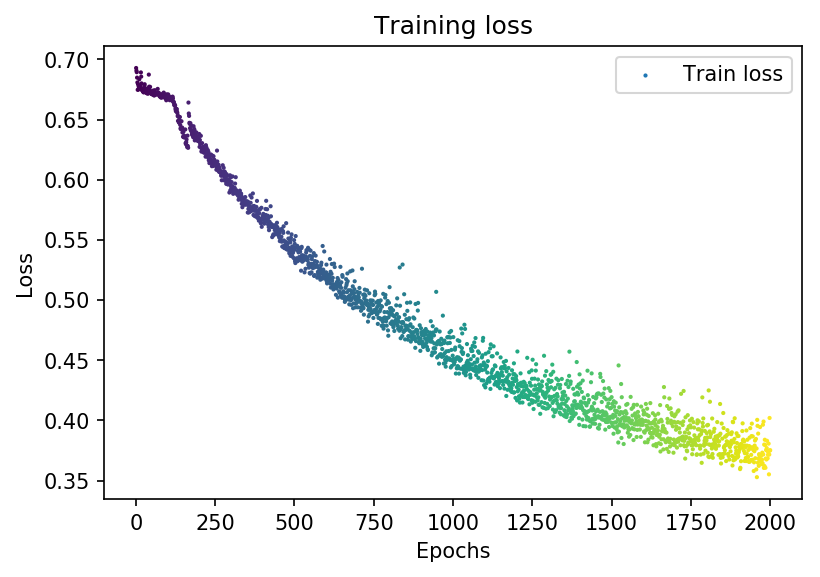

In [72]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

plt.figure(dpi=150)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.scatter(epochs, loss, s=1, c=epochs,label='Train loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

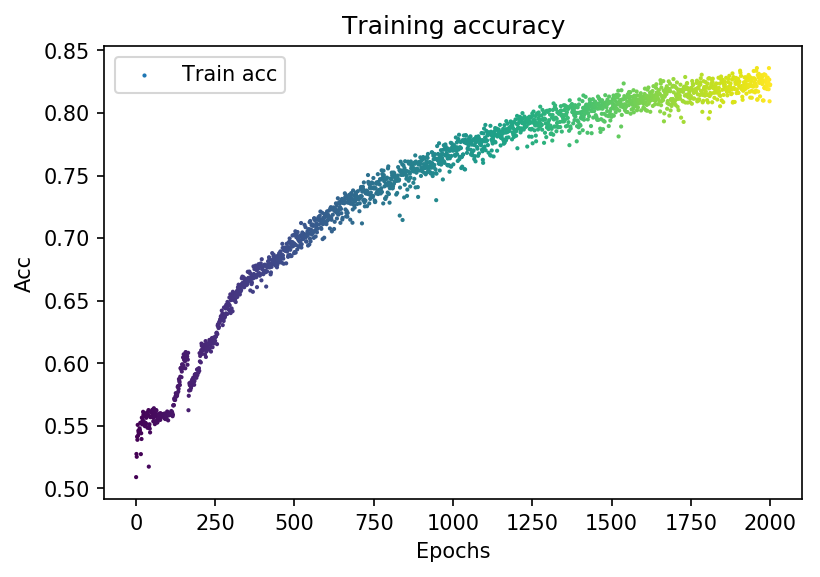

In [71]:
plt.clf()   # clear figure
plt.figure(dpi=150)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.scatter(epochs, acc, s=1, c=epochs,label='Train acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()